<a href="https://colab.research.google.com/github/sarahalkananii-hash/WeatherAUS/blob/main/WeatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     33987
           1       0.77      0.49      0.60      9651

    accuracy                           0.85     43638
   macro avg       0.82      0.73      0.76     43638
weighted avg       0.85      0.85      0.84     43638



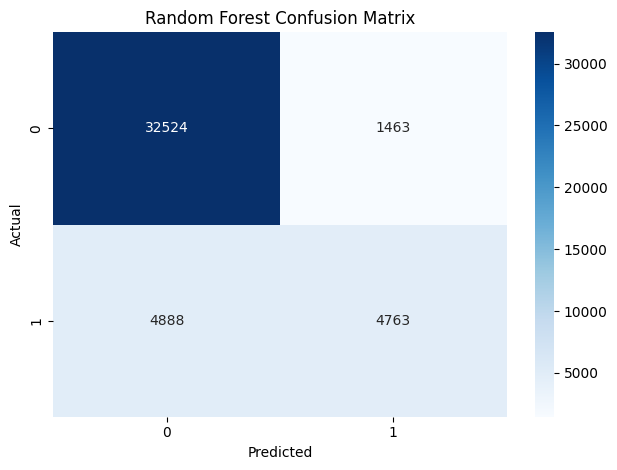


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33987
           1       0.73      0.47      0.57      9651

    accuracy                           0.84     43638
   macro avg       0.80      0.71      0.74     43638
weighted avg       0.83      0.84      0.83     43638



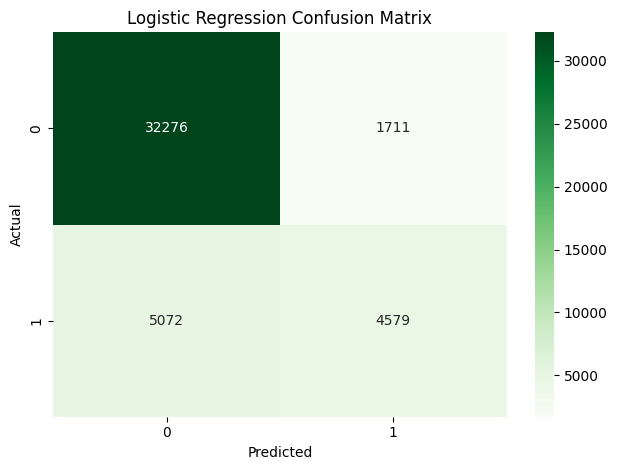

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('weatherAUS.csv')

df.drop(['Date', 'Location'], axis=1, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()
        if not mode_val.empty:
            df[col] = df[col].fillna(mode_val[0])
        else:
            df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].median())

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_params = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [None, 5, 10]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3)
rf_grid.fit(x_train, y_train)
y_pred_rf = rf_grid.predict(x_test)

print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])
logreg_params = {
    'classifier__C': [0.1, 1.0, 10.0]
}
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=3)
logreg_grid.fit(x_train, y_train)
y_pred_log = logreg_grid.predict(x_test)

print("\n--- Logistic Regression ---")
print(classification_report(y_test, y_pred_log))

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure()
sns.heatmap(conf_matrix_log, annot=True, cmap='Greens', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
